In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,8)
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import datetime

# Window and Lags


## shift & diff

 Shift index by desired number of periods with an optional time freq.

In [9]:
df = pd.read_csv("../data/stock_data.csv")

In [10]:
df['AAPL_return'] = df['AAPL'] / df['AAPL'].shift(1)

In [11]:
df.head()

,date,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM,AAPL_return
0,10/29/07,37.41,185.09,34.46,106.78,57.13,31.78,65.67,1540.98,85.51,NaN
1,10/30/07,36.43,187.00,34.39,106.15,56.99,32.70,65.80,1531.02,83.25,1.010319
2,10/31/07,36.79,189.95,34.97,108.01,57.30,33.84,65.69,1549.38,84.03,1.015775
3,11/01/07,35.22,187.44,34.27,105.72,56.85,34.07,64.51,1508.44,80.84,0.986786
4,11/02/07,35.83,187.87,34.27,106.59,56.95,34.07,65.03,1509.65,80.32,1.002294


In [12]:
#df

In [13]:
df.diff?

Signature: df.diff(periods=1, axis=0) -> 'DataFrame'
Docstring:
First discrete difference of element.

Calculates the difference of a DataFrame element compared with another
element in the DataFrame (default is the element in the same column
of the previous row).

Parameters
----------
periods : int, default 1
    Periods to shift for calculating difference, accepts negative
    values.
axis : {0 or 'index', 1 or 'columns'}, default 0
    Take difference over rows (0) or columns (1).

Returns
-------
DataFrame

See Also
--------
Series.diff: First discrete difference for a Series.
DataFrame.pct_change: Percent change over given number of periods.
DataFrame.shift: Shift index by desired number of periods with an
    optional time freq.

Notes
-----
For boolean dtypes, this uses :meth:`operator.xor` rather than
:meth:`operator.sub`.

Examples
--------
Difference with previous row

>>> df = pd.DataFrame({'a': [1, 2, 3, 4, 5, 6],
...                    'b': [1, 1, 2, 3, 5, 8],
...         

In [14]:
df['AAPL_5D_range'] = df['AAPL'].diff(5)

<AxesSubplot:>

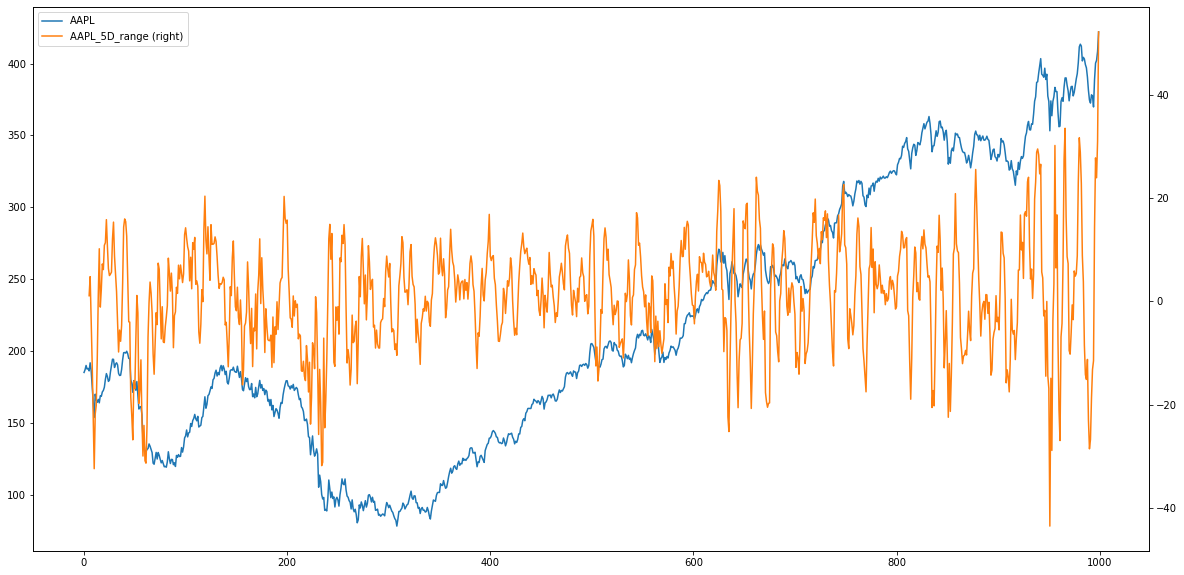

In [15]:
df[['AAPL', 'AAPL_5D_range']].plot(figsize=(20,10), secondary_y='AAPL_5D_range')


## Rolling

 Provide rolling window calculations

In [16]:
df.rolling?


Signature:
df.rolling(
    window,
    min_periods=None,
    center=False,
    win_type=None,
    on=None,
    axis=0,
    closed=None,
)
Docstring:
Provide rolling window calculations.

Parameters
----------
window : int, offset, or BaseIndexer subclass
    Size of the moving window. This is the number of observations used for
    calculating the statistic. Each window will be a fixed size.

    If its an offset then this will be the time period of each window. Each
    window will be a variable sized based on the observations included in
    the time-period. This is only valid for datetimelike indexes.

    If a BaseIndexer subclass is passed, calculates the window boundaries
    based on the defined ``get_window_bounds`` method. Additional rolling
    keyword arguments, namely `min_periods`, `center`, and
    `closed` will be passed to `get_window_bounds`.
min_periods : int, default None
    Minimum number of observations in window required to have a value
    (otherwise result is N

In [17]:

df.rolling(30)

Rolling [window=30,center=False,axis=0]

In [18]:
df['AAPL_rollmean'] = df['AAPL'].rolling(30).mean()

In [19]:
df.head(50)

,date,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM,AAPL_return,AAPL_5D_range,AAPL_rollmean
0,10/29/07,37.41,185.09,34.46,106.78,57.13,31.78,65.67,1540.98,85.51,NaN,NaN,NaN
1,10/30/07,36.43,187.00,34.39,106.15,56.99,32.70,65.80,1531.02,83.25,1.010319,NaN,NaN
2,10/31/07,36.79,189.95,34.97,108.01,57.30,33.84,65.69,1549.38,84.03,1.015775,NaN,NaN
3,11/01/07,35.22,187.44,34.27,105.72,56.85,34.07,64.51,1508.44,80.84,0.986786,NaN,NaN
4,11/02/07,35.83,187.87,34.27,106.59,56.95,34.07,65.03,1509.65,80.32,1.002294,NaN,NaN
5,11/05/07,35.22,186.18,34.15,105.48,56.70,33.77,64.84,1502.17,80.07,0.991004,1.09,NaN
6,11/06/07,35.84,191.79,34.14,105.27,56.80,33.47,65.49,1520.27,82.56,1.030132,4.79,NaN
7,11/07/07,34.76,186.30,33.20,103.69,56.19,32.65,64.46,1475.62,79.96,0.971375,-3.65,NaN
8,11/08/07,35.00,175.47,33.15,99.05,56.79,31.94,65.50,1474.77,82.00,0.941868,-11.97,NaN
9,11/09/07,34.47,165.37,32.61,93.58,57.29,31.01,65.48,1453.70,79.64,0.942440,-22.50,NaN


<AxesSubplot:>

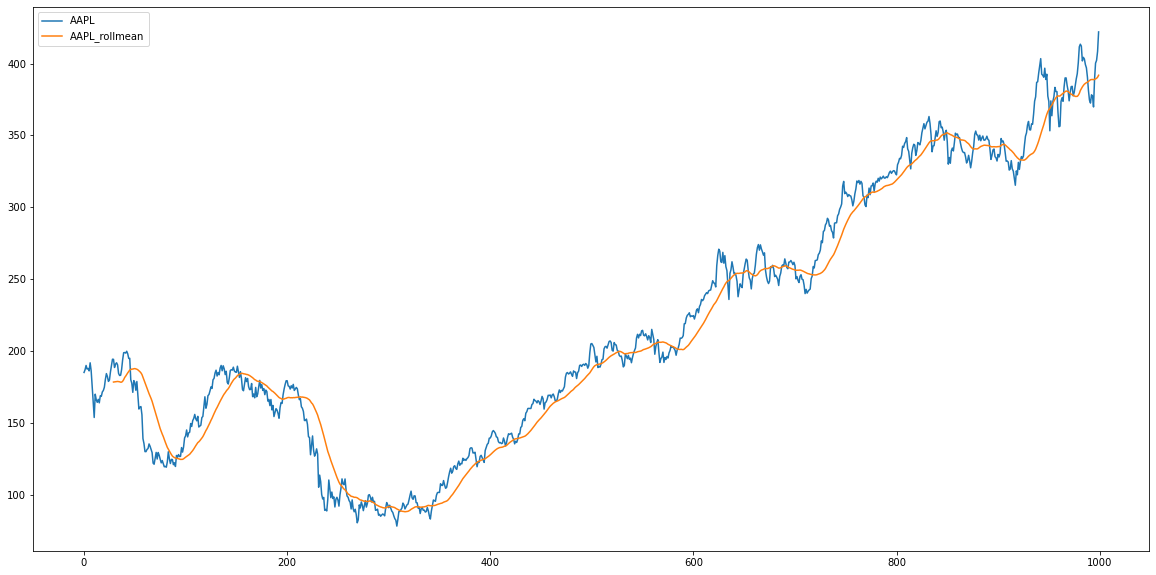

In [20]:
df[['AAPL', 'AAPL_rollmean']].plot(figsize=(20,10))

## expanding

In [21]:
df['AAPL'].expanding().max()

0      185.09
1      187.00
2      189.95
3      189.95
4      189.95
        ...  
995    413.45
996    413.45
997    413.45
998    413.45
999    422.00
Name: AAPL, Length: 1000, dtype: float64

In [22]:
#cumulative product
df['AAPL_return'].cumprod()


0           NaN
1      1.010319
2      1.026257
3      1.012697
4      1.015020
         ...   
995    2.100654
996    2.162678
997    2.172943
998    2.206656
999    2.279972
Name: AAPL_return, Length: 1000, dtype: float64